<a href="https://colab.research.google.com/github/ItxJack/Digit-Recognizer/blob/main/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("Shape of the training data:", train_df.shape)
print("Shape of the test data:", test_df.shape)
train_df.head()

Shape of the training data: (22372, 785)
Shape of the test data: (26424, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_train = train_df.drop(labels = ["label"],axis= 1)
Y_train = train_df["label"]
X_test = test_df
del train_df

Preprocessing with Scaling and PCA

In [10]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0
print(X_train_scaled.isnull().any().any())
X_train_scaled.fillna(0, inplace=True)
X_test_scaled.fillna(0, inplace=True)

True


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)
print(f"Original number of features: {X_train_scaled.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")

Original number of features: 784
Reduced number of features after PCA: 153


Training a Model

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

rfc.fit(X_train_pca, Y_train)
y_train_pred = rfc.predict(X_train_pca)
accuracy = accuracy_score(Y_train, y_train_pred)
print(f"\nAccuracy on the training set: {accuracy:.4f}")


Accuracy on the training set: 1.0000


In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score (rfc,X_train_pca,Y_train,cv = 3, scoring= "accuracy",n_jobs = -1)
print(f"\nScores from each fold: {scores}")
print(f"Mean accuracy: {scores.mean():.4f}")
print(f"Standard deviation: {scores.std():.4f}")


Scores from each fold: [0.92732636 0.93066917 0.92812123]
Mean accuracy: 0.9287
Standard deviation: 0.0014


Confusion Matrix

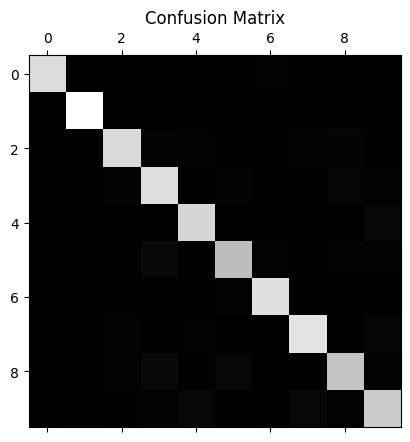

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_train_pred = cross_val_predict(rfc, X_train_pca, Y_train, cv=3, n_jobs=-1)

conf_mx = confusion_matrix(Y_train, y_train_pred)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.title("Confusion Matrix")
plt.show()